In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 40kB/s 
     |████████████████████████████████| 501kB 30.3MB/s 
     |████████████████████████████████| 4.3MB 25.4MB/s 
     |████████████████████████████████| 51kB 2.5MB/s 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,BatchNormalization,Dense,Dropout,Flatten
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
train_df=pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')

In [ ]:
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
train_df.shape

(76020, 371)

In [ ]:
x_train_full=train_df.drop(['ID','TARGET'],axis=1)

In [ ]:
x_train_full.shape

(76020, 369)

In [ ]:
y_train_full=train_df['TARGET']

In [ ]:
y_train_full.shape

(76020,)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train_full,y_train_full,test_size=0.2,stratify=y_train_full)

In [ ]:
((x_train.shape),(x_test.shape))

((60816, 369), (15204, 369))

In [ ]:
filter=VarianceThreshold(threshold=0.01)
filter.fit(x_train)
x_train=filter.transform(x_train)
x_test=filter.transform(x_test)

In [ ]:
((x_train.shape),(x_test.shape))

((60816, 270), (15204, 270))

In [ ]:
x_train_T=pd.DataFrame(x_train.T)
x_test_T=pd.DataFrame(x_test.T)

In [ ]:
keepfeatures=[not temp for temp in x_train_T.duplicated()]

In [ ]:
x_train=x_train_T[keepfeatures].T
x_test=x_test_T[keepfeatures].T

In [ ]:
((x_train.shape),(x_test.shape))

((60816, 253), (15204, 253))

In [ ]:
x_train=StandardScaler().fit_transform(x_train.values)
x_test=StandardScaler().fit_transform(x_test.values)

In [ ]:
x_train=x_train.reshape(60816,253,1)
x_test=x_test.reshape(15204,253,1)

In [ ]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (253,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1901/1901 [==============================] - 90s 47ms/step - loss: 0.2283 - accuracy: 0.9512 - val_loss: 0.1807 - val_accuracy: 0.9597
Epoch 2/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1762 - accuracy: 0.9593 - val_loss: 0.1718 - val_accuracy: 0.9604
Epoch 3/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1697 - accuracy: 0.9601 - val_loss: 0.1663 - val_accuracy: 0.9605
Epoch 4/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1645 - accuracy: 0.9604 - val_loss: 0.1613 - val_accuracy: 0.9602
Epoch 5/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1620 - accuracy: 0.9604 - val_loss: 0.1590 - val_accuracy: 0.9603
Epoch 6/10
1901/1901 [==============================] - 90s 47ms/step - loss: 0.1626 - accuracy: 0.9603 - val_loss: 0.1581 - val_accuracy: 0.9602
Epoch 7/10
1901/1901 [==============================] - 90s 47ms/step - loss: 0.1578 - accuracy: 0.9604 - val_loss: 0.1560 -

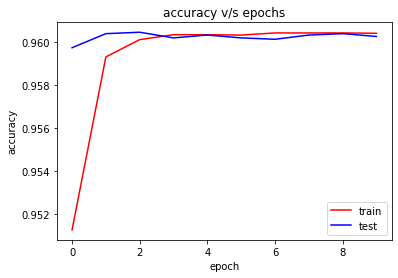

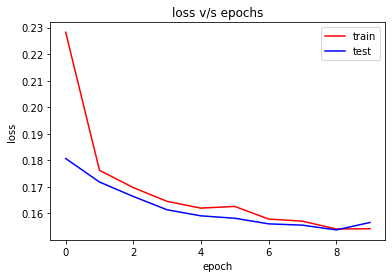

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')
plt.title("accuracy v/s epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.title("loss v/s epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'])
plt.show()